In [1]:
import pandas as pd
import numpy as np
import warnings
from datetime import datetime, time
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy import stats
import math
import glob
from functools import reduce
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.iolib.summary2 import summary_col
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 200)

## Jump identification

a jump is itentified if a 5-min period standardlized abosolute reurn is in excess of the 99.9% critical level of the standard normal distribution

In [2]:
def RV(lst):
    # daily realized volatility for day t
    result = 0
    for num in lst:
        result += num ** 2
    return result

def BV(lst):
    #realized bipower variation
    result = 0
    for i in range(len(test_list)-1):
        result +=  abs(test_list[i]) * abs(test_list[i+1])
    result = result * (math.pi/2)
    return result

#### AUD

In [3]:
file_list = glob.glob('2008ACJU/*-AUD=D3.csv')
AUD_jumps = {}
AUD_RV ={}
for file in tqdm(file_list):
    temp_month = pd.read_csv(file)
    temp_month = temp_month [(temp_month ['Type'] == 'Trade') | (( temp_month ['Bid Price']!=0 )&( temp_month ['Ask Price']!=0))] .reset_index(drop=True)

    temp_month['Ask Price'].fillna(method='ffill', inplace=True)
    temp_month['Bid Price'].fillna(method='ffill', inplace=True)
    # DATA CLEANING: in line 127716 -127718, the price of 2009ACJU/-2009-01-CAD=D3.csv, the bid price is 0.00001 for CAD
    temp_month = temp_month[(temp_month['Ask Price']-  temp_month['Bid Price'])<temp_month['Bid Price']]
    temp_month = temp_month[(temp_month ['Type'] == 'Quote') | ((temp_month['Price'] <= temp_month['Ask Price']) & (temp_month['Price'] >= temp_month['Bid Price']))]

    #mid-quote
    temp_month['mid'] = (temp_month['Ask Price'] + temp_month['Bid Price'])/2
    temp_month.dropna(subset=['mid'], inplace=True) # some months may start with NANs
    date_list = temp_month['Date[G]'].unique()
    for date in date_list:
        temp_date = temp_month[temp_month['Date[G]']==date]
        timedeltas =  pd.to_timedelta(temp_date['Time[G]'])
        # Calculate the time differences in seconds
        time_diffs = (timedeltas - timedeltas.iloc[0]).dt.total_seconds()
        # Calculate the interval index
        interval_index = (time_diffs / 300).astype(int) + 1
        temp_date['interval_index']=interval_index
        five_minute_return = temp_date.groupby('interval_index').apply(lambda x: np.log(x.iloc[-1]['mid']) - np.log(x.iloc[0]['mid']))
        test_list = five_minute_return.to_list()
        jump = RV(test_list)- BV(test_list)
        AUD_RV[ date]  = RV(test_list)
        AUD_jumps[ date] = max(jump, 0)

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [01:58<00:00,  4.94s/it]


#### CAD

In [4]:
file_list = glob.glob('2008ACJU/*-CAD=D3.csv')
CAD_jumps = {}
CAD_RV ={}
for file in tqdm(file_list):
    temp_month = pd.read_csv(file)
    temp_month = temp_month [(temp_month ['Type'] == 'Trade') | (( temp_month ['Bid Price']!=0 )&( temp_month ['Ask Price']!=0))] .reset_index(drop=True)

    temp_month['Ask Price'].fillna(method='ffill', inplace=True)
    temp_month['Bid Price'].fillna(method='ffill', inplace=True)
    # DATA CLEANING: in line 127716 -127718, the price of 2009ACJU/-2009-01-CAD=D3.csv, the bid price is 0.00001 for CAD
    temp_month = temp_month[(temp_month['Ask Price']-  temp_month['Bid Price'])<temp_month['Bid Price']]
    temp_month = temp_month[(temp_month ['Type'] == 'Quote') | ((temp_month['Price'] <= temp_month['Ask Price']) & (temp_month['Price'] >= temp_month['Bid Price']))]

    #mid-quote
    temp_month['mid'] = (temp_month['Ask Price'] + temp_month['Bid Price'])/2
    temp_month.dropna(subset=['mid'], inplace=True) # some months may start with NANs
    date_list = temp_month['Date[G]'].unique()
    for date in date_list:
        temp_date = temp_month[temp_month['Date[G]']==date]
        timedeltas =  pd.to_timedelta(temp_date['Time[G]'])
        # Calculate the time differences in seconds
        time_diffs = (timedeltas - timedeltas.iloc[0]).dt.total_seconds()
        # Calculate the interval index
        interval_index = (time_diffs / 300).astype(int) + 1
        temp_date['interval_index']=interval_index
        five_minute_return = temp_date.groupby('interval_index').apply(lambda x: np.log(x.iloc[-1]['mid']) - np.log(x.iloc[0]['mid']))
        test_list = five_minute_return.to_list()
        jump = RV(test_list)- BV(test_list)
        CAD_RV[ date]  = RV(test_list)
        CAD_jumps[ date] = max(jump, 0)
        

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [01:26<00:00,  3.60s/it]


#### JPY

In [5]:
file_list = glob.glob('2008ACJU/*-JPY=D3.csv')
JPY_jumps = {}
JPY_RV ={}
for file in tqdm(file_list):
    temp_month = pd.read_csv(file)
    temp_month = temp_month [(temp_month ['Type'] == 'Trade') | (( temp_month ['Bid Price']!=0 )&( temp_month ['Ask Price']!=0))] .reset_index(drop=True)

    temp_month['Ask Price'].fillna(method='ffill', inplace=True)
    temp_month['Bid Price'].fillna(method='ffill', inplace=True)
    # DATA CLEANING: in line 127716 -127718, the price of 2009ACJU/-2009-01-CAD=D3.csv, the bid price is 0.00001 for CAD
    temp_month = temp_month[(temp_month['Ask Price']-  temp_month['Bid Price'])<temp_month['Bid Price']]
    temp_month = temp_month[(temp_month ['Type'] == 'Quote') | ((temp_month['Price'] <= temp_month['Ask Price']) & (temp_month['Price'] >= temp_month['Bid Price']))]

    #mid-quote
    temp_month['mid'] = (temp_month['Ask Price'] + temp_month['Bid Price'])/2
    temp_month.dropna(subset=['mid'], inplace=True) # some months may start with NANs
    date_list = temp_month['Date[G]'].unique()
    for date in date_list:
        temp_date = temp_month[temp_month['Date[G]']==date]
        timedeltas =  pd.to_timedelta(temp_date['Time[G]'])
        # Calculate the time differences in seconds
        time_diffs = (timedeltas - timedeltas.iloc[0]).dt.total_seconds()
        # Calculate the interval index
        interval_index = (time_diffs / 300).astype(int) + 1
        temp_date['interval_index']=interval_index
        five_minute_return = temp_date.groupby('interval_index').apply(lambda x: np.log(x.iloc[-1]['mid']) - np.log(x.iloc[0]['mid']))
        test_list = five_minute_return.to_list()
        jump = RV(test_list)- BV(test_list)
        JPY_RV[ date]  = RV(test_list)
        JPY_jumps[ date] = max(jump, 0)
        

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:44<00:00,  1.86s/it]


In [6]:
dict_df = pd.DataFrame.from_dict(AUD_jumps, orient='index', columns=['AUD_Jumps']).reset_index()
dict_df = dict_df.rename(columns={'index': 'Date[G]'})
dict_df['Date[G]'] = pd.to_datetime(dict_df['Date[G]'])

dict_df1 = pd.DataFrame.from_dict(AUD_RV, orient='index', columns=['AUD_RV']).reset_index()
dict_df1 = dict_df1.rename(columns={'index': 'Date[G]'})
dict_df1['Date[G]'] = pd.to_datetime(dict_df1['Date[G]'])

dict_df2 = pd.DataFrame.from_dict(CAD_jumps, orient='index', columns=['CAD_Jumps']).reset_index()
dict_df2 = dict_df2.rename(columns={'index': 'Date[G]'})
dict_df2['Date[G]'] = pd.to_datetime(dict_df2['Date[G]'])

dict_df3 = pd.DataFrame.from_dict(CAD_RV, orient='index', columns=['CAD_RV']).reset_index()
dict_df3 = dict_df3.rename(columns={'index': 'Date[G]'})
dict_df3['Date[G]'] = pd.to_datetime(dict_df3['Date[G]'])

dict_df4 = pd.DataFrame.from_dict(JPY_jumps, orient='index', columns=['JPY_Jumps']).reset_index()
dict_df4 = dict_df4.rename(columns={'index': 'Date[G]'})
dict_df4['Date[G]'] = pd.to_datetime(dict_df4['Date[G]'])

dict_df5 = pd.DataFrame.from_dict(JPY_RV, orient='index', columns=['JPY_RV']).reset_index()
dict_df5 = dict_df5.rename(columns={'index': 'Date[G]'})
dict_df5['Date[G]'] = pd.to_datetime(dict_df5['Date[G]'])

In [7]:
# list of dataframes to be merged
dfs = [dict_df, dict_df1,dict_df2,dict_df3,dict_df4,dict_df5]

# merge dataframes based on common column
merged_df = reduce(lambda left,right: pd.merge(left,right,on='Date[G]'), dfs)
merged_df.set_index('Date[G]', inplace=True)
z_scores =  np.abs(stats.zscore(merged_df, nan_policy='omit', axis=0))


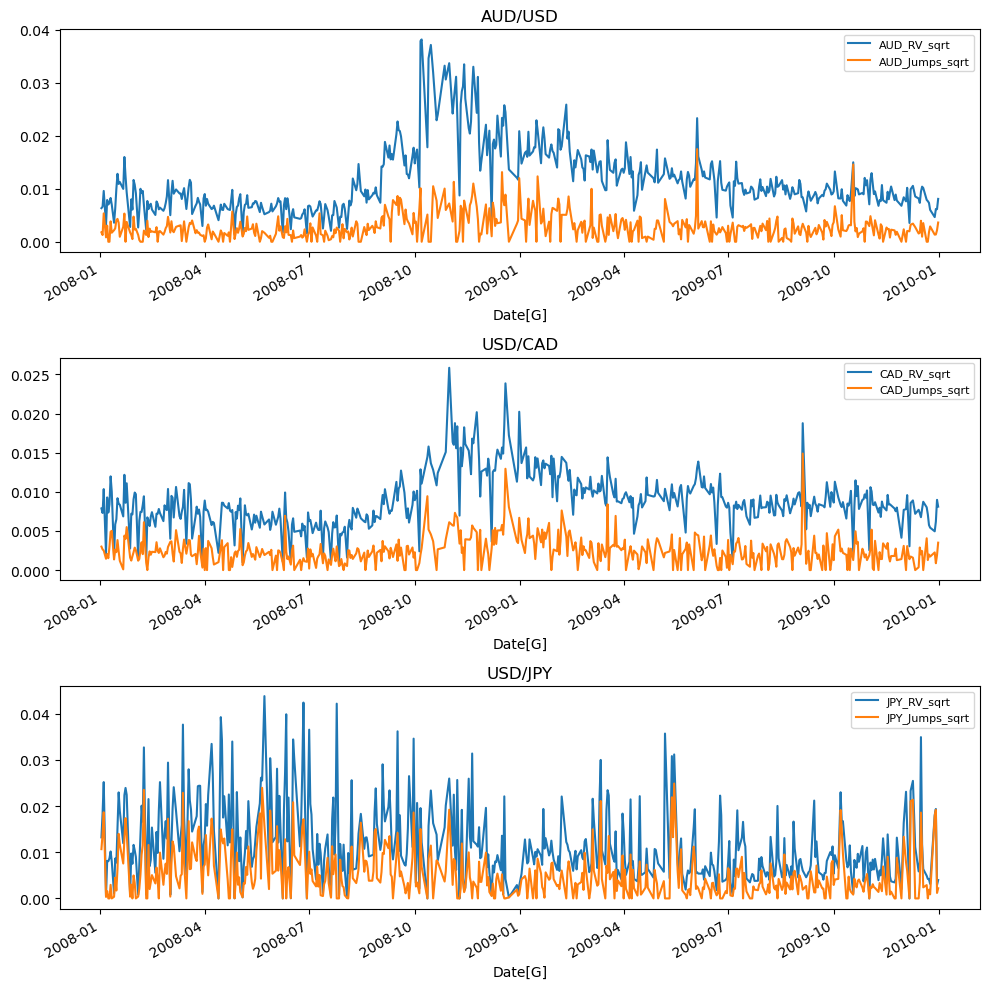

In [8]:
merged_df_selected= merged_df
merged_df_selected['AUD_Jumps_sqrt'] = np.sqrt(merged_df_selected['AUD_Jumps'])
merged_df_selected['AUD_RV_sqrt'] = np.sqrt(merged_df_selected['AUD_RV'])
merged_df_selected['CAD_Jumps_sqrt'] = np.sqrt(merged_df_selected['CAD_Jumps'])
merged_df_selected['CAD_RV_sqrt'] = np.sqrt(merged_df_selected['CAD_RV'])
merged_df_selected['JPY_Jumps_sqrt'] = np.sqrt(merged_df_selected['JPY_Jumps'])
merged_df_selected['JPY_RV_sqrt'] = np.sqrt(merged_df_selected['JPY_RV'])
z_scores =  np.abs(stats.zscore(merged_df_selected, nan_policy='omit', axis=0))
merged_df_selected = merged_df_selected.loc[(z_scores <= 2).all(axis=1)]
window_size=20

# Create a figure with three subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10,10))


merged_df_selected[['AUD_RV_sqrt','AUD_Jumps_sqrt']].plot(ax=axs[0], fontsize=10)
axs[0].legend(fontsize=8)
axs[0].set_title('AUD/USD')

merged_df_selected[['CAD_RV_sqrt','CAD_Jumps_sqrt']].plot(ax=axs[1], fontsize=10)
axs[1].legend(fontsize=8)
axs[1].set_title('USD/CAD')

merged_df_selected[['JPY_RV_sqrt','JPY_Jumps_sqrt']].plot(ax=axs[2], fontsize=10)
axs[2].legend(fontsize=8)
axs[2].set_title('USD/JPY')

# Set a common x-axis label and tight layout
fig.tight_layout()

# Show the plot
plt.show()


#### Ljung-Box statistic

In [9]:
# AUD
lags = range(1, 11)
lb_results1 = acorr_ljungbox(merged_df_selected['AUD_RV_sqrt'], lags=lags)

# CAD
lags = range(1, 11)
lb_results2 = acorr_ljungbox(merged_df_selected['CAD_RV_sqrt'], lags=lags)

# JPY
lags = range(1, 11)
lb_results3 = acorr_ljungbox(merged_df_selected['JPY_RV_sqrt'], lags=lags)


In [10]:
merge1 = pd.merge(lb_results1,lb_results2, left_index=True, right_index=True)
merge2 = pd.merge(merge1,lb_results3, left_index=True, right_index=True).round(3)
#merge2.insert(0, 'Lag', merge2.index)

In [11]:
merge2

,lb_stat_x,lb_pvalue_x,lb_stat_y,lb_pvalue_y,lb_stat,lb_pvalue
1,339.287,0.0,206.591,0.0,34.600,0.0
2,624.891,0.0,395.159,0.0,41.195,0.0
3,914.851,0.0,572.140,0.0,62.983,0.0
4,1193.691,0.0,742.236,0.0,86.503,0.0
5,1475.783,0.0,928.433,0.0,122.940,0.0
6,1753.708,0.0,1130.420,0.0,133.718,0.0
7,2010.819,0.0,1292.436,0.0,136.345,0.0
8,2252.203,0.0,1450.689,0.0,146.253,0.0
9,2496.560,0.0,1592.738,0.0,153.821,0.0
10,2730.776,0.0,1755.393,0.0,161.334,0.0


In [12]:
#print(merge2.to_latex())

In [13]:
# AUD
lags = range(1, 11)
lb_results1 = acorr_ljungbox(merged_df_selected['AUD_Jumps_sqrt'], lags=lags)

# CAD
lags = range(1, 11)
lb_results2 = acorr_ljungbox(merged_df_selected['CAD_Jumps_sqrt'], lags=lags)

# JPY
lags = range(1, 11)
lb_results3 = acorr_ljungbox(merged_df_selected['JPY_Jumps_sqrt'], lags=lags)

merge1 = pd.merge(lb_results1,lb_results2, left_index=True, right_index=True)
merge2 = pd.merge(merge1,lb_results3, left_index=True, right_index=True).round(3)
#merge2.insert(0, 'Lag', merge2.index)
merge2
#print(merge2.to_latex())

,lb_stat_x,lb_pvalue_x,lb_stat_y,lb_pvalue_y,lb_stat,lb_pvalue
1,38.282,0.0,31.274,0.0,47.771,0.0
2,66.657,0.0,49.325,0.0,49.761,0.0
3,95.374,0.0,71.882,0.0,62.085,0.0
4,110.872,0.0,80.005,0.0,70.348,0.0
5,136.835,0.0,91.111,0.0,82.786,0.0
6,163.817,0.0,104.248,0.0,91.095,0.0
7,192.098,0.0,110.005,0.0,92.236,0.0
8,201.724,0.0,124.781,0.0,93.660,0.0
9,219.539,0.0,143.877,0.0,97.312,0.0
10,234.039,0.0,168.152,0.0,98.819,0.0


In [14]:
merged_df_selected.to_csv('data/Jumps/jumps and RV.csv')

# regression of jumps on liquidity

In [15]:
market_liqudity =  pd.read_csv('data/market liquidity/Market Illiquidity(individual).csv')
market_liqudity.columns = ['Date[G]','ILSAUD','ILEAUD','ILPAUD','ILSCAD','ILECAD','ILPCAD','ILSJPY','ILEJPY','ILPJPY']
market_liqudity['Date[G]'] = pd.to_datetime(market_liqudity['Date[G]'] )
market_liqudity.set_index('Date[G]', inplace=True)
market_liqudity.columns = ['ILSAUD','ILEAUD','ILPAUD','ILSCAD','ILECAD','ILPCAD','ILSJPY','ILEJPY','ILPJPY']

In [16]:
liquidity_jumps= pd.merge(merged_df_selected,market_liqudity,on='Date[G]')
liquidity_jumps[['ILSAUD','ILEAUD','ILPAUD','ILSCAD','ILECAD','ILPCAD','ILSJPY','ILEJPY','ILPJPY']] = liquidity_jumps[['ILSAUD','ILEAUD','ILPAUD','ILSCAD','ILECAD','ILPCAD','ILSJPY','ILEJPY','ILPJPY']]/10000

In [21]:
liquidity_jumps

,AUD_Jumps,AUD_RV,CAD_Jumps,CAD_RV,JPY_Jumps,JPY_RV,AUD_Jumps_sqrt,AUD_RV_sqrt,CAD_Jumps_sqrt,CAD_RV_sqrt,JPY_Jumps_sqrt,JPY_RV_sqrt,ILSAUD,ILEAUD,ILPAUD,ILSCAD,ILECAD,ILPCAD,ILSJPY,ILEJPY,ILPJPY
Date[G],,,,,,,,,,,,,,,,,,,,,
2008-01-02,0.000003,0.000040,9.007912e-06,0.000062,1.137831e-04,0.000175,0.001775,0.006342,0.003001,0.007878,0.010667,0.013218,-0.000063,-0.000050,-0.000046,-5.939343e-05,-0.000047,-0.000032,-0.000011,0.000067,-0.000021
2008-01-03,0.000002,0.000044,7.007748e-06,0.000053,1.947636e-04,0.000339,0.001267,0.006608,0.002647,0.007305,0.013956,0.018424,-0.000073,-0.000062,-0.000046,-7.163631e-05,-0.000057,-0.000034,-0.000045,-0.000014,-0.000021
2008-01-04,0.000029,0.000092,6.248562e-06,0.000107,3.478107e-04,0.000634,0.005350,0.009583,0.002500,0.010350,0.018650,0.025182,-0.000059,-0.000043,-0.000046,-5.628131e-05,-0.000024,-0.000036,-0.000015,0.000058,-0.000018
2008-01-07,0.000009,0.000062,4.210581e-06,0.000086,2.547467e-06,0.000066,0.003045,0.007876,0.002052,0.009286,0.001596,0.008123,-0.000068,-0.000050,-0.000052,-6.717496e-05,-0.000043,-0.000053,-0.000029,0.000032,-0.000024
2008-01-08,0.000000,0.000049,2.308387e-06,0.000054,0.000000e+00,0.000065,0.000000,0.007018,0.001519,0.007356,0.000000,0.008049,-0.000071,-0.000060,-0.000051,-6.948414e-05,-0.000057,-0.000049,-0.000041,0.000013,-0.000023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-24,0.000008,0.000036,2.980669e-06,0.000029,7.846906e-07,0.000010,0.002889,0.006021,0.001726,0.005424,0.000886,0.003155,-0.000005,0.000031,-0.000049,-1.302419e-05,0.000023,-0.000050,-0.000027,-0.000129,-0.000026
2009-12-28,0.000002,0.000022,5.099232e-06,0.000025,3.180302e-04,0.000327,0.001341,0.004652,0.002258,0.004957,0.017833,0.018083,-0.000037,0.000025,-0.000049,-3.733481e-05,-0.000040,0.000048,-0.000081,-0.000205,-0.000026
2009-12-29,0.000002,0.000038,7.685520e-07,0.000038,3.672282e-04,0.000375,0.001374,0.006185,0.000877,0.006200,0.019163,0.019360,-0.000053,-0.000062,-0.000052,-4.626849e-05,-0.000048,0.000247,-0.000047,-0.000060,-0.000028


In [36]:
# AUD
model1 = smf.ols('ILSAUD ~ AUD_Jumps.shift()', data=liquidity_jumps)
result1 = model1.fit()

model2 = smf.ols('ILEAUD ~ AUD_Jumps.shift()', data=liquidity_jumps)
result2 = model2.fit()

model3 = smf.ols('ILPAUD ~ AUD_Jumps.shift()', data=liquidity_jumps)
result3 = model3.fit()

# CAD
model4 = smf.ols('ILSCAD ~ CAD_Jumps.shift()', data=liquidity_jumps)
result4 = model4.fit()

model5 = smf.ols('ILECAD ~ CAD_Jumps.shift()', data=liquidity_jumps)
result5 = model5.fit()

model6 = smf.ols('ILPCAD ~ CAD_Jumps.shift()', data=liquidity_jumps)
result6 = model6.fit()

# JPY
model7 = smf.ols('ILSJPY ~ JPY_Jumps.shift()', data=liquidity_jumps)
result7 = model7.fit()

model8 = smf.ols('ILEJPY ~ JPY_Jumps.shift()', data=liquidity_jumps)
result8 = model8.fit()

model9 = smf.ols('ILPJPY ~ JPY_Jumps.shift()', data=liquidity_jumps)
result9 = model9.fit()

# Summary table
results = summary_col([result1,result2,result3,result4,result5,result6,result7,result8,result9],
                      stars=True,
                      float_format='%0.2f',
                      model_names=[
                          'ILSAUD','ILEAUD','ILPAUD',
                          'ILSCAD','ILECAD','ILPCAD',
                          'ILSJPY','ILEJPY','ILPJPY'],
                      regressor_order=[
                          'AUD_Jumps.shift()', 'CAD_Jumps.shift()', 'JPY_Jumps.shift()'],
                      info_dict={'N': lambda x: f"{int(x.nobs)}"},
                      drop_omitted=True)

print(results)


                   ILSAUD  ILEAUD  ILPAUD  ILSCAD  ILECAD ILPCAD ILSJPY ILEJPY ILPJPY
-------------------------------------------------------------------------------------
AUD_Jumps.shift() 1.66*** 1.43*** 0.50***                                            
                  (0.16)  (0.17)  (0.14)                                             
CAD_Jumps.shift()                         1.81*** 1.99*** 0.08                       
                                          (0.26)  (0.28)  (0.24)                     
JPY_Jumps.shift()                                                -0.06  0.01   0.00  
                                                                 (0.04) (0.05) (0.05)
R-squared         0.19    0.13    0.02    0.09    0.10    0.00   0.00   0.00   0.00  
R-squared Adj.    0.19    0.13    0.02    0.09    0.09    -0.00  0.00   -0.00  -0.00 
N                 488     488     488     488     488     488    488    488    488   
Standard errors in parentheses.
* p<.1, ** p<.05, ***

In [37]:
print(results.as_latex())

\begin{table}
\caption{}
\label{}
\begin{center}
\begin{tabular}{llllllllll}
\hline
                   & ILSAUD  & ILEAUD  & ILPAUD  & ILSCAD  & ILECAD  & ILPCAD & ILSJPY & ILEJPY & ILPJPY  \\
\hline
AUD\_Jumps.shift() & 1.66*** & 1.43*** & 0.50*** &         &         &        &        &        &         \\
                   & (0.16)  & (0.17)  & (0.14)  &         &         &        &        &        &         \\
CAD\_Jumps.shift() &         &         &         & 1.81*** & 1.99*** & 0.08   &        &        &         \\
                   &         &         &         & (0.26)  & (0.28)  & (0.24) &        &        &         \\
JPY\_Jumps.shift() &         &         &         &         &         &        & -0.06  & 0.01   & 0.00    \\
                   &         &         &         &         &         &        & (0.04) & (0.05) & (0.05)  \\
R-squared          & 0.19    & 0.13    & 0.02    & 0.09    & 0.10    & 0.00   & 0.00   & 0.00   & 0.00    \\
R-squared Adj.     & 0.19    & 0.13  

In [34]:
# AUD models
model1 = smf.ols('ILSAUD ~ AUD_Jumps_sqrt.shift()', data=liquidity_jumps)
result1 = model1.fit()

model2 = smf.ols('ILEAUD ~ AUD_Jumps_sqrt.shift()', data=liquidity_jumps)
result2 = model2.fit()

model3 = smf.ols('ILPAUD ~ AUD_Jumps_sqrt.shift()', data=liquidity_jumps)
result3 = model3.fit()

# CAD models
model4 = smf.ols('ILSCAD ~ CAD_Jumps_sqrt.shift()', data=liquidity_jumps)
result4 = model4.fit()

model5 = smf.ols('ILECAD ~ CAD_Jumps_sqrt.shift()', data=liquidity_jumps)
result5 = model5.fit()

model6 = smf.ols('ILPCAD ~ CAD_Jumps_sqrt.shift()', data=liquidity_jumps)
result6 = model6.fit()

# JPY models
model7 = smf.ols('ILSJPY ~ JPY_Jumps_sqrt.shift()', data=liquidity_jumps)
result7 = model7.fit()

model8 = smf.ols('ILEJPY ~ JPY_Jumps_sqrt.shift()', data=liquidity_jumps)
result8 = model8.fit()

model9 = smf.ols('ILPJPY ~ JPY_Jumps_sqrt.shift()', data=liquidity_jumps)
result9 = model9.fit()

# Summary table
results = summary_col(
    [result1, result2, result3, result4, result5, result6, result7, result8, result9],
    stars=True,
    float_format='%0.2f',
    model_names=[
        'ILSAUD', 'ILEAUD', 'ILPAUD',
        'ILSCAD', 'ILECAD', 'ILPCAD',
        'ILSJPY', 'ILEJPY', 'ILPJPY'
    ],
    regressor_order=[
        'AUD_Jumps_sqrt.shift()', 'CAD_Jumps_sqrt.shift()', 'JPY_Jumps_sqrt.shift()'
    ],
    info_dict={'N': lambda x: f"{int(x.nobs)}"},
    drop_omitted=True
)

print(results)


                        ILSAUD  ILEAUD  ILPAUD  ILSCAD  ILECAD ILPCAD ILSJPY ILEJPY ILPJPY
------------------------------------------------------------------------------------------
AUD_Jumps_sqrt.shift() 0.02*** 0.02*** 0.01***                                            
                       (0.00)  (0.00)  (0.00)                                             
CAD_Jumps_sqrt.shift()                         0.02*** 0.02*** -0.00                      
                                               (0.00)  (0.00)  (0.00)                     
JPY_Jumps_sqrt.shift()                                                -0.00  0.00   0.00  
                                                                      (0.00) (0.00) (0.00)
R-squared              0.21    0.14    0.02    0.14    0.12    0.00   0.00   0.00   0.00  
R-squared Adj.         0.21    0.14    0.02    0.13    0.12    -0.00  -0.00  0.00   -0.00 
N                      488     488     488     488     488     488    488    488    488  

In [35]:
print(results.as_latex())

\begin{table}
\caption{}
\label{}
\begin{center}
\begin{tabular}{llllllllll}
\hline
                         & ILSAUD  & ILEAUD  & ILPAUD  & ILSCAD  & ILECAD  & ILPCAD & ILSJPY & ILEJPY & ILPJPY  \\
\hline
AUD\_Jumps\_sqrt.shift() & 0.02*** & 0.02*** & 0.01*** &         &         &        &        &        &         \\
                         & (0.00)  & (0.00)  & (0.00)  &         &         &        &        &        &         \\
CAD\_Jumps\_sqrt.shift() &         &         &         & 0.02*** & 0.02*** & -0.00  &        &        &         \\
                         &         &         &         & (0.00)  & (0.00)  & (0.00) &        &        &         \\
JPY\_Jumps\_sqrt.shift() &         &         &         &         &         &        & -0.00  & 0.00   & 0.00    \\
                         &         &         &         &         &         &        & (0.00) & (0.00) & (0.00)  \\
R-squared                & 0.21    & 0.14    & 0.02    & 0.14    & 0.12    & 0.00   & 0.00   & 0.00   & 

In [30]:
#original_version, wrong
"""
model1 = smf.ols('AUD_Jumps~AUD_Jumps.shift()+ILSAUD', data=liquidity_jumps)
result1 = model1.fit()

model2 = smf.ols('AUD_Jumps~AUD_Jumps.shift()+ILEAUD', data=liquidity_jumps)
result2 = model2.fit()

model3 = smf.ols('AUD_Jumps~AUD_Jumps.shift()+ILPAUD', data=liquidity_jumps)
result3 = model3.fit()


model4 = smf.ols('CAD_Jumps~CAD_Jumps.shift()+ILSCAD', data=liquidity_jumps)
result4 = model4.fit()

model5 = smf.ols('CAD_Jumps~CAD_Jumps.shift()+ILECAD', data=liquidity_jumps)
result5 = model5.fit()

model6 = smf.ols('CAD_Jumps~CAD_Jumps.shift()+ILPCAD', data=liquidity_jumps)
result6 = model6.fit()

model7 = smf.ols('JPY_Jumps~JPY_Jumps.shift()+ILSJPY', data=liquidity_jumps)
result7 = model7.fit()

model8 = smf.ols('JPY_Jumps~JPY_Jumps.shift()+ILEJPY', data=liquidity_jumps)
result8 = model8.fit()

model9 = smf.ols('JPY_Jumps~JPY_Jumps.shift()+ILPJPY', data=liquidity_jumps)
result9 = model9.fit()


results =  summary_col([result1,result2,result3,result4,result5,result6,result7,result8,result9],
                       stars=True,
                       float_format='%0.2f',
                           model_names=['AUD_Jumps','AUD_Jumps','AUD_Jumps','CAD_Jumps','CAD_Jumps','CAD_Jumps','JPY_Jumps','JPY_Jumps','JPY_Jumps'],
                       regressor_order=['AUD_Jumps.shift()','CAD_Jumps.shift()','JPY_Jumps.shift()','ILSAUD','ILEAUD','ILPAUD','ILSCAD',
                                        'ILECAD','ILPCAD','ILSJPY','ILEJPY','ILPJPY'],  # chcnage the column name 
                       info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))},
                       drop_omitted=True
                       )
"""